# Importing libraries

# Python Libraries Description

## Overview
This markdown describes Python libraries commonly used in Jupyter Notebooks for data analysis, visualization, and machine learning.

## Library Descriptions
- **numpy**: Handles numerical computations with arrays and matrices.
- **pandas**: Manages and analyzes data using DataFrames.
- **matplotlib.pyplot**: Generates plots and visualizations.
- **seaborn**: Creates enhanced statistical visualizations.
- **tensorflow**: Supports building and training machine learning models.
- **tensorflow**: A comprehensive platform for building and training machine learning models.
    - **tensorflow.keras**: A high-level API within TensorFlow for building and training deep learning models (e.g., `Sequential`, `Dense`, `Dropout`).
- **scikit-learn (sklearn)**: A powerful and widely used library for classical machine learning. It includes modules for:
    - **Preprocessing**: (e.g., `LabelEncoder`, `StandardScaler`)
    - **Model Selection**: (e.g., `train_test_split`)
    - **Models**: (e.g., `LogisticRegression`)
    - **Metrics**: (e.g., `accuracy_score`, `classification_report`)
- **lime**: Stands for Local Interpretable Model-agnostic Explanations. It's a library used to explain the predictions of any machine learning model.
- **shap**: (SHapley Additive exPlanations) A library for explaining the output of machine learning models, providing insights into feature importance and prediction logic.

## Purpose
These libraries enable efficient data processing, visualization, and machine learning model development in Jupyter Notebooks, using standard aliases for concise coding.

In [58]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Loading and Preparing Data in Jupyter Notebook

## Overview
This Python code loads three CSV files into pandas DataFrames and then renames specific columns to prevent naming conflicts, preparing the data for analysis in a Jupyter Notebook.

## Code Description
- **`hotels = pd.read_csv(...)`**: Loads hotel data from a CSV file into a DataFrame named `hotels`.
- **`reviews = pd.read_csv(...)`**: Loads review data from a CSV file into a DataFrame named `reviews`.
- **`users = pd.read_csv(...)`**: Loads user data from a CSV file into a DataFrame named `users`.
- **`hotels = hotels.rename(...)`**: Renames the `country` column in the `hotels` DataFrame to `hotel_country`.
- **`users = users.rename(...)`**: Renames the `country` column in the `users` DataFrame to `user_country`.

## Purpose
This code imports datasets into pandas DataFrames. It also performs initial data cleaning by **renaming the 'country' columns** in the `hotels` and `users` tables. This is a crucial step to avoid ambiguity and prevent column name collisions before merging these DataFrames.

In [59]:
hotels=pd.read_csv("C:\\Users\\abdel\\ACL\\archive\\hotels.csv")
reviews=pd.read_csv("C:\\Users\\abdel\\ACL\\archive\\reviews.csv")
users=pd.read_csv("C:\\Users\\abdel\\ACL\\archive\\users.csv")
hotels = hotels.rename(columns={'country': 'hotel_country'})
users = users.rename(columns={'country': 'user_country'})

### 🔍 Data Quality Check

This cell checks for duplicates and missing values in the **Hotels**, **Reviews**, and **Users** datasets using `duplicated()` and `isnull().sum()`.  
It was found that there are **no duplicate records** and **no missing values** in any of the datasets.


In [60]:
print(f"Hotels duplicates: {hotels.duplicated().sum()}")
print(f"Reviews duplicates: {reviews.duplicated().sum()}")
print(f"Users duplicates: {users.duplicated().sum()}")
print("--------------------------------")
print(f"Hotels nuls: {hotels.isnull().sum()}")
print("--------------------------------")
print(f"Reviews nuls: {reviews.isnull().sum()}")
print("--------------------------------")
print(f"Users nuls: {users.isnull().sum()}")

Hotels duplicates: 0
Reviews duplicates: 0
Users duplicates: 0
--------------------------------
Hotels nuls: hotel_id                0
hotel_name              0
city                    0
hotel_country           0
star_rating             0
lat                     0
lon                     0
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64
--------------------------------
Reviews nuls: review_id                0
user_id                  0
hotel_id                 0
review_date              0
score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
review_text              0
dtype: int64
--------------------------------
Users nuls: user_id           0
user_gender       0
user_country      0
age_group         0
traveller_type    0
join_date  

### 🧾 Dataset Overview

This cell displays the structure and summary information of the **Reviews**, **Hotels**, and **Users** datasets using `info()`.  
It shows the number of entries, column names, data types, and confirms that there are **no missing values** in any dataset.


In [61]:
reviews.info()
print("--------------------------------")   
hotels.info()
print("--------------------------------")
users.info()
print("--------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   review_date            50000 non-null  object 
 4   score_overall          50000 non-null  float64
 5   score_cleanliness      50000 non-null  float64
 6   score_comfort          50000 non-null  float64
 7   score_facilities       50000 non-null  float64
 8   score_location         50000 non-null  float64
 9   score_staff            50000 non-null  float64
 10  score_value_for_money  50000 non-null  float64
 11  review_text            50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 2

# Merging DataFrames

## Overview
Merges pandas DataFrames (`reviews`, `hotels`, `users`) for analysis in Jupyter Notebook.

## Description
- **`review_hotel_df = reviews.merge(hotels, on='hotel_id', how='left')`**: Merges `reviews` with `hotels` on `hotel_id` using left join.
- **`df = review_hotel_df.merge(users, on='user_id', how='left')`**: Merges `review_hotel_df` with `users` on `user_id` using left join.

## Purpose
Combines review, hotel, and user data into one DataFrame for integrated analysis.

In [62]:
review_hotel_df=reviews.merge(hotels,on='hotel_id',how='left')
df=review_hotel_df.merge(users,on='user_id',how='left')


## Data Integrity Check: Verifying Row Count and Nulls in Key Columns (Features about the user)

In [63]:
print(f"Total rows in df (should be ~50,000): {len(df)}")
print("\nNull values *after* merge:")
print(df[['user_gender', 'age_group', 'traveller_type']].isnull().sum())

Total rows in df (should be ~50,000): 50000

Null values *after* merge:
user_gender       0
age_group         0
traveller_type    0
dtype: int64


# Country Grouping in DataFrame

## Overview
Assigns country groups to hotels based on their country and displays selected columns.

## Description
- **`groups = {...}`**: Defines a dictionary mapping regions to lists of countries (e.g., North_America: United States, Canada).
- **`df["country_group"] = df["hotel_country"].apply(...)`**: Creates a `country_group` column by mapping `hotel_country` to a region from `groups`, defaulting to "Other" if not found.
- **`df[["hotel_country","user_country","country_group"]]`**: Selects `hotel_country`, `user_country`, and `country_group` columns for display.

## Purpose
Categorizes hotels by geographic region and shows relevant country data to fill country_group column.

In [64]:
groups={'North_America':['United States','Canada'],
        'Western_Europe':['Germany','France','United Kingdom','Netherlands','Spain','Italy'],
        'Eastern_Europe':['Russia'],
        'East_Asia':['China','Japan','South Korea'],
        'Southeast_Asia':['Thailand','Singapore'],
        'Middle_East':['United Arab Emirates','Turkey'],
        'Africa':['Egypt','Nigeria','South Africa'],
        'Oceania':['Australia','New Zealand'],
        'South_America':['Brazil','Argentina'],
        'South_Asia':['India'],
        'North_America_Mexico':['Mexico']}

df["country_group"]=df["hotel_country"].apply(lambda x: next((key for key, value in groups.items() if x in value), "Other"))

df[["hotel_country","user_country","country_group"]]

,hotel_country,user_country,country_group
0,United States,New Zealand,North_America
1,Japan,United Kingdom,East_Asia
2,Egypt,Spain,Africa
3,Spain,United Kingdom,Western_Europe
4,Russia,Australia,Eastern_Europe
...,...,...,...
49995,Nigeria,Mexico,Africa
49996,Brazil,New Zealand,South_America
49997,Singapore,Russia,Southeast_Asia
49998,Turkey,United Kingdom,Middle_East


# Data-Engineering Question 1 

## Overview
Calculates the best city for each traveller type based on reviews.

## Description
- **`city_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index().sort_values(...)`**: Groups data by `traveller_type` and `city`, computes mean `score_overall`, resets index, and sorts by `traveller_type` (ascending) and `score_overall` (descending).
- **`best_cities = city_scores.groupby('traveller_type').head(1)`**: Selects the top city (highest score) for each `traveller_type`.


In [65]:
city_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index().sort_values(['traveller_type', 'score_overall'], ascending=[True,False])

best_cities = city_scores.groupby('traveller_type').head(1)

# display(city_scores)


# The Plot of question 1
 ### 📊 Best City per Traveller Type

This bar chart compares the **average overall score** for different traveller types, highlighting the **best-rated city** for each group.  
Each bar represents a traveller type, labeled with the city that received the highest score and its exact value.  
The plot shows how preferences differ among traveller types based on their overall ratings.


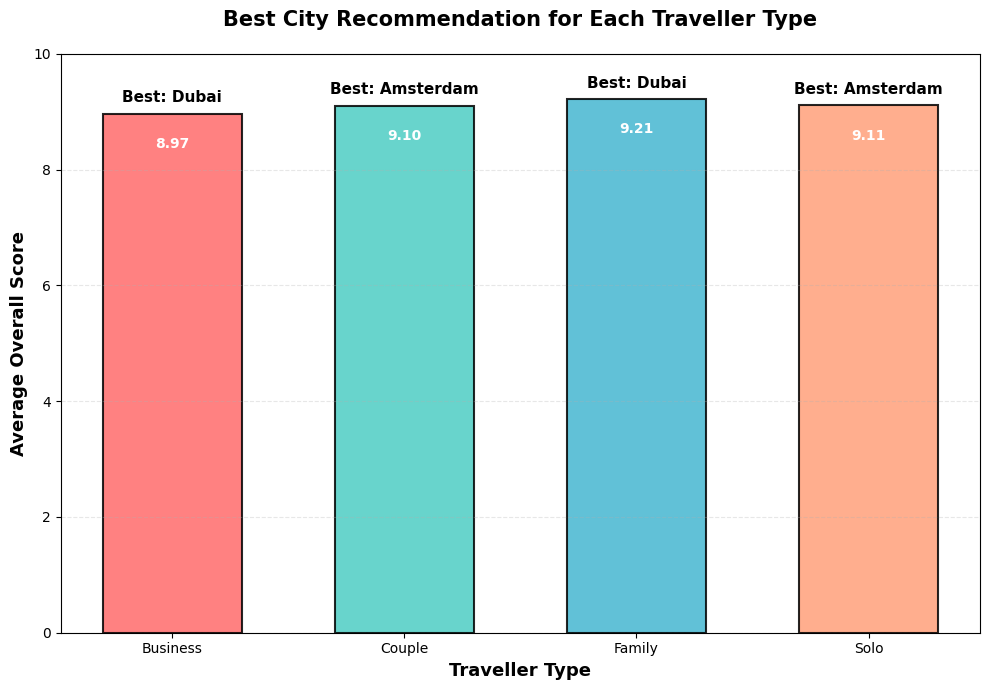

In [66]:
plt.figure(figsize=(10, 7))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars = plt.bar(best_cities['traveller_type'], 
               best_cities['score_overall'], 
               color=colors, 
               edgecolor='black', 
               linewidth=1.5, 
               alpha=0.85,
               width=0.6)

plt.xlabel('Traveller Type', fontsize=13, fontweight='bold')
plt.ylabel('Average Overall Score', fontsize=13, fontweight='bold')
plt.title('Best City Recommendation for Each Traveller Type', 
          fontsize=15, fontweight='bold', pad=20)
plt.ylim(0, 10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add city names and scores on top of each bar (replace 🏆 with text)
for i, (traveller, city, score) in enumerate(zip(best_cities['traveller_type'], 
                                                   best_cities['city'], 
                                                   best_cities['score_overall'])):
    plt.text(i, score + 0.15, f'Best: {city}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.text(i, score - 0.4, f'{score:.2f}', 
             ha='center', va='top', fontsize=10, fontweight='bold', color='white')

# plt.xticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()



# Question 2

### 🌍 Top Countries by Value-for-Money Score

This code calculates the **average value-for-money score** for each country within every **age group**.  
It then sorts the results and extracts the **top 3 countries** per age group with the highest average scores.


In [67]:
top_countries=df.groupby(["age_group","user_country"])["score_value_for_money"].mean().reset_index()
top_3=top_countries.sort_values(["age_group","score_value_for_money"],ascending=[True,False]).groupby("age_group").head(3)
print(top_3)

    age_group user_country  score_value_for_money
5       18-24        Egypt               9.007317
19      18-24        Spain               8.768132
0       18-24    Argentina               8.689000
44      25-34        Spain               8.733259
43      25-34  South Korea               8.632800
37      25-34  Netherlands               8.542157
66      35-44    Singapore               8.795385
50      35-44    Argentina               8.696519
63      35-44  New Zealand               8.641079
94      45-54       Turkey               8.641778
89      45-54    Singapore               8.555914
79      45-54        China               8.547538
111       55+  New Zealand               8.686264
101       55+       Canada               8.621084
108       55+        Japan               8.524918


## Plot: Value-for-Money Analysis

### 💰 Top 3 Countries: Value Score by Age Group

This grouped bar chart visualizes the **average "value-for-money" score** across the **top 3 countries**. The data is further segmented by **age group**, which is represented by different colored bars (the `hue`).

Each cluster of bars represents a single country, allowing for a direct comparison of how different age demographics rate the "value-for-money" in that location. The y-axis shows the average score, making it easy to see which country and age group combination has the highest perceived value.

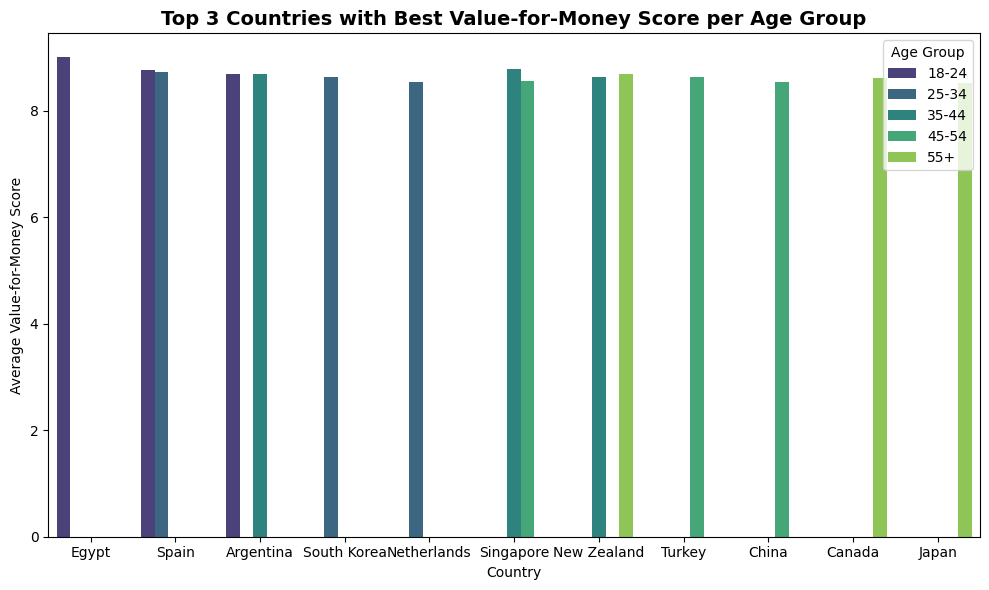

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_3, 
    x='user_country', 
    y='score_value_for_money', 
    hue='age_group', 
    palette='viridis'
)

plt.title('Top 3 Countries with Best Value-for-Money Score per Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average Value-for-Money Score')

plt.legend(title='Age Group')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------

In [69]:
df.groupby('city')[['country_group']].nunique()

,country_group
city,
Amsterdam,1
Bangkok,1
Barcelona,1
Berlin,1
Buenos Aires,1
Cairo,1
Cape Town,1
Dubai,1
Istanbul,1


## Encoding the user country , gender , traveller type and age

In [70]:
df = pd.get_dummies(df, columns=['traveller_type'], drop_first=True)
# df = pd.get_dummies(df, columns=['user_country'], drop_first=True)
df = pd.get_dummies(df, columns=['user_gender'], drop_first=True)

age_order = {
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

df['age'] = df['age_group'].map(age_order)
df.drop(columns=['age_group'], inplace=True)

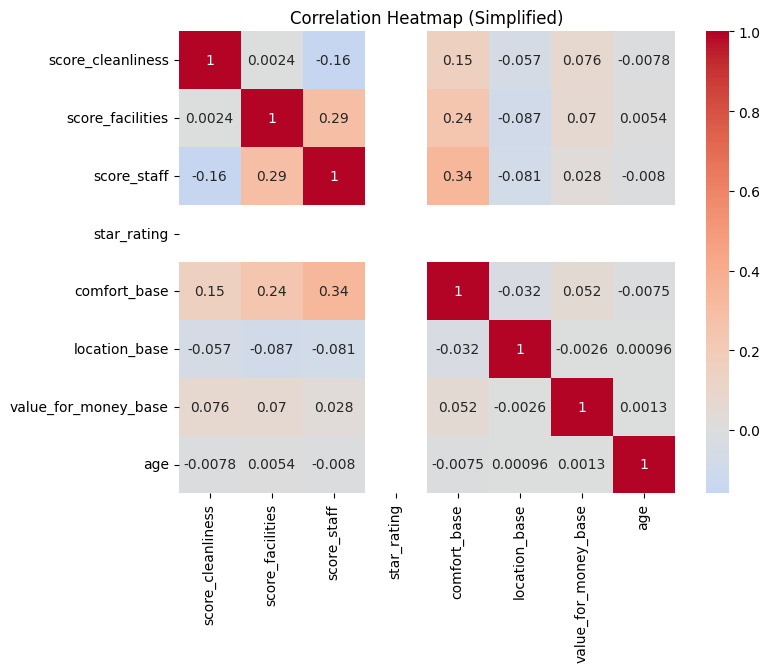

In [71]:
cols = [
    'score_cleanliness', 'score_facilities', 'score_staff',
    'star_rating', 'comfort_base', 'location_base',
    'value_for_money_base', 'age'

]

corr = df[cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Simplified)")
plt.show()

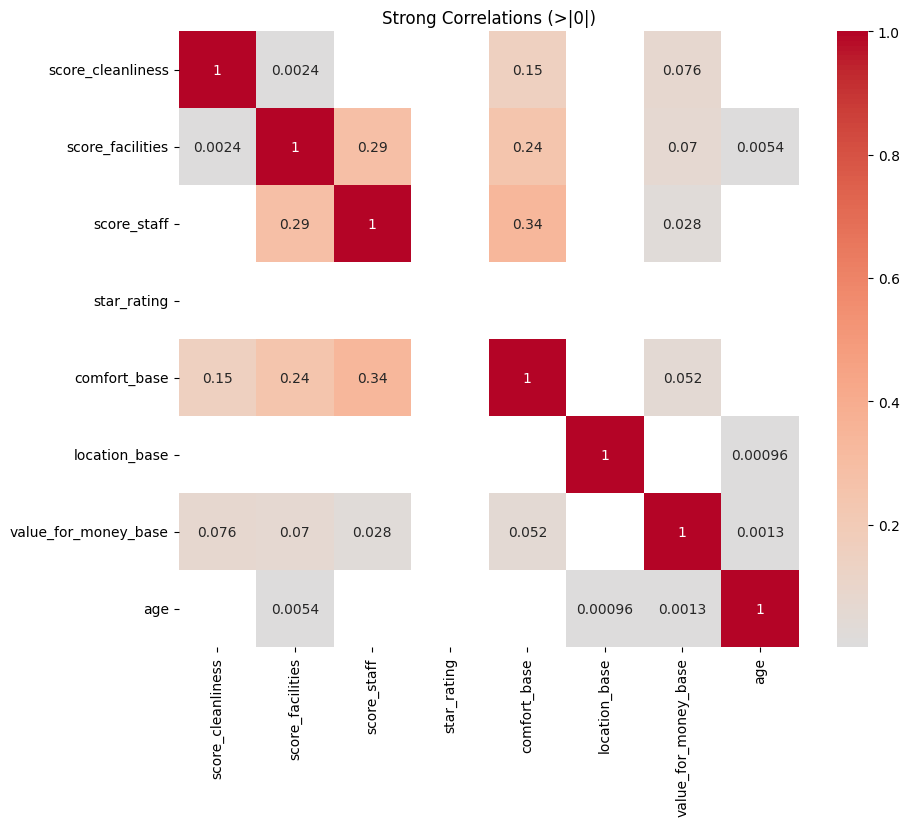

In [72]:
strong_corr = corr[(corr > 0) | (corr <= -0.5)]
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Strong Correlations (>|0|)")
plt.show()

## Feature Engineering: Score vs. Baseline

### 📈 Creating "Difference" Features

This code block creates seven new "difference" (`diff_`) columns.

These features are calculated by subtracting a "base" value from the actual "score" for categories like cleanliness, comfort, and staff. This measures how much a hotel **over-performs or under-performs** compared to its baseline.

It also calculates the difference between the `score_overall` and the `star_rating`, which can show if a hotel is rated higher or lower than its official star category would suggest.

Finally, the code confirms the creation and prints the `head()` of these new columns to show the results.

In [73]:

df['diff_cleanliness'] = df['score_cleanliness'] - df['cleanliness_base']
df['diff_comfort'] = df['score_comfort'] - df['comfort_base']
df['diff_facilities'] = df['score_facilities'] - df['facilities_base']
df['diff_overall_vs_star'] = df['score_overall'] - df['star_rating']
df['diff_location'] = df['score_location'] - df['location_base']
df['diff_staff'] = df['score_staff'] - df['staff_base']
df['diff_value_for_money'] = df['score_value_for_money'] - df['value_for_money_base']

print("Successfully created all 'diff' features. ✅")
print("\nHead of the new 'diff' features:")
print(df[[ 'diff_cleanliness', 'diff_comfort', 'diff_facilities','diff_overall_vs_star', 'diff_location', 'diff_staff', 'diff_value_for_money']].head())

Successfully created all 'diff' features. ✅

Head of the new 'diff' features:
   diff_cleanliness  diff_comfort  diff_facilities  diff_overall_vs_star  \
0              -0.5          -0.1             -0.4                   3.7   
1               0.4           0.1             -0.3                   4.1   
2               0.9           0.1             -0.3                   3.8   
3              -0.2          -0.3             -0.4                   3.9   
4              -0.2           0.2              0.3                   4.1   

   diff_location  diff_staff  diff_value_for_money  
0           -0.5         0.2                   0.7  
1            0.1        -0.1                   0.4  
2           -0.4        -0.6                   0.2  
3           -0.1         0.1                  -0.5  
4           -0.7         0.3                   0.3  


### 🧹 Feature Selection and Cleanup

This cell removes unnecessary or non-numerical columns (like IDs, text, and location data) that are not needed for analysis or modeling.  
The resulting `final_df` contains only the relevant features for further processing.


In [74]:

from typing import final


columns_to_drop = [
    'review_id',         
    'user_id',           
    'hotel_id',          
    'review_date',      
    'join_date',          
    'review_text',       
    'hotel_name',        
    'hotel_country',   
    'lat', 
    'score_overall',
    'score_cleanliness',
    'score_comfort',
    'score_facilities',
    'score_location',
    'score_staff',
    'score_value_for_money',
    'city',
    'star_rating',
    'cleanliness_base',
    'comfort_base',
    'facilities_base',
    'location_base',
    'staff_base',
    'value_for_money_base',   
    'user_country',            
    'lon'  
]
final_df=df.drop(columns=columns_to_drop)

# final_df.to_csv('final_dataset.csv', index=False)   
final_df.head()


,country_group,traveller_type_Couple,traveller_type_Family,traveller_type_Solo,user_gender_Male,user_gender_Other,age,diff_cleanliness,diff_comfort,diff_facilities,diff_overall_vs_star,diff_location,diff_staff,diff_value_for_money
0,North_America,False,False,True,False,False,2,-0.5,-0.1,-0.4,3.7,-0.5,0.2,0.7
1,East_Asia,True,False,False,False,False,3,0.4,0.1,-0.3,4.1,0.1,-0.1,0.4
2,Africa,True,False,False,False,False,5,0.9,0.1,-0.3,3.8,-0.4,-0.6,0.2
3,Western_Europe,False,False,False,False,False,3,-0.2,-0.3,-0.4,3.9,-0.1,0.1,-0.5
4,Eastern_Europe,False,True,False,True,False,4,-0.2,0.2,0.3,4.1,-0.7,0.3,0.3


In [75]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_group          50000 non-null  object 
 1   traveller_type_Couple  50000 non-null  bool   
 2   traveller_type_Family  50000 non-null  bool   
 3   traveller_type_Solo    50000 non-null  bool   
 4   user_gender_Male       50000 non-null  bool   
 5   user_gender_Other      50000 non-null  bool   
 6   age                    50000 non-null  int64  
 7   diff_cleanliness       50000 non-null  float64
 8   diff_comfort           50000 non-null  float64
 9   diff_facilities        50000 non-null  float64
 10  diff_overall_vs_star   50000 non-null  float64
 11  diff_location          50000 non-null  float64
 12  diff_staff             50000 non-null  float64
 13  diff_value_for_money   50000 non-null  float64
dtypes: bool(5), float64(7), int64(1), object(1)
memory usa

In [76]:
final_df.to_csv('final_dataset.csv', index=False)

# Checking for null values 

after checking the data in the table there was no null values

In [77]:
final_df.isnull().sum()

country_group            0
traveller_type_Couple    0
traveller_type_Family    0
traveller_type_Solo      0
user_gender_Male         0
user_gender_Other        0
age                      0
diff_cleanliness         0
diff_comfort             0
diff_facilities          0
diff_overall_vs_star     0
diff_location            0
diff_staff               0
diff_value_for_money     0
dtype: int64

In [78]:
final_df.to_csv('final_dataset.csv', index=False)

## 🎯 Defining Features (X) and Target (y)

This code block prepares the data for a machine learning model by separating it into two distinct variables:

1.  **`X` (Features)**: This DataFrame, `X`, holds all the **independent variables** (or features) that the model will use to learn and make predictions. It is created by selecting specific columns from the `final_df`, including:
    * The **"difference" features** (e.g., `diff_overall_vs_star`, `diff_cleanliness`).
    * **One-hot encoded features** for `traveller_type` and `user_gender`.
    * The numerical `age` feature.

2.  **`y` (Target)**: This pandas Series, `y`, holds the **dependent variable** (or target) that the model will be trained to predict.
    * In this case, the target is the `country_group` column.

In [79]:
X = final_df[['diff_overall_vs_star','diff_cleanliness','diff_comfort','diff_facilities','diff_location','diff_staff','diff_value_for_money','traveller_type_Couple','traveller_type_Family','traveller_type_Solo', 'user_gender_Male','user_gender_Other','age' ]] 
y = final_df['country_group']

## Plot: Target Variable Distribution

### 📊 Country Group Distribution

This line of code visualizes the distribution of the target variable `y` (which contains the "Country Group" categories).

It first performs a `value_counts()` to count the total number of occurrences for each unique category in `y`. Then, it immediately uses `.plot(kind='bar')` to create a **bar chart** of these counts. The `title` is set to "Country Group Distribution", and `plt.show()` displays the final visual.

**Observation:** The plot shows an imbalanced distribution, with a **significantly larger number of samples for the "Western Europe" category** compared to the others.

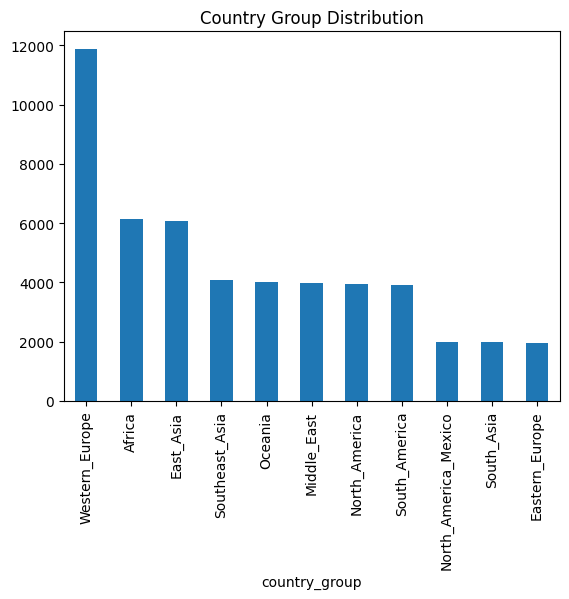

In [80]:
y.value_counts().plot(kind='bar', title='Country Group Distribution')
plt.show()

## Data Preparation

### 🔪 Splitting Data into Training and Test Sets

This line of code uses the `train_test_split` function from scikit-learn to divide the dataset into two parts: a **training set** and a **test set**.

* **`X, y`**: These are the complete datasets, with `X` being the features and `y` being the target variable (labels).
* **`test_size=0.2`**: This parameter specifies that **20%** of the data should be reserved for the test set. The remaining **80%** will be used for the training set.
* **`random_state=42`**: This acts as a seed for the random shuffling. By setting a specific number (like 42), we ensure that the split is **reproducible**—meaning, every time this code is run, the data will be split in the exact same way.

The function returns four new variables:
1.  **`X_train`**: The 80% of features used for training the model.
2.  **`X_test`**: The 20% of features used for testing the model.
3.  **`y_train`**: The corresponding 80% of labels for training.
4.  **`y_test`**: The corresponding 20% of labels for testing.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
log_model = LogisticRegression(
    max_iter=100,
)

In [83]:
log_model.fit(X_train,y_train)

c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
y_pred = log_model.predict(X_test)

print("=== Logistic Regression Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

=== Logistic Regression Evaluation ===
Accuracy: 0.3222
Precision: 0.24346349673260093
Recall: 0.3222
F1 Score: 0.2348494413158195

Detailed Report:
                       precision    recall  f1-score   support

              Africa       0.33      0.64      0.44      1247
           East_Asia       0.29      0.29      0.29      1195
      Eastern_Europe       0.00      0.00      0.00       358
         Middle_East       0.08      0.00      0.01       816
       North_America       0.21      0.02      0.04       776
North_America_Mexico       0.08      0.03      0.05       400
             Oceania       0.17      0.00      0.00       805
       South_America       0.41      0.14      0.21       813
          South_Asia       0.00      0.00      0.00       389
      Southeast_Asia       0.15      0.08      0.11       818
      Western_Europe       0.35      0.78      0.48      2383

            accuracy                           0.32     10000
           macro avg       0.19      0.18 

c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abdel\fire_en

In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_group          50000 non-null  object 
 1   traveller_type_Couple  50000 non-null  bool   
 2   traveller_type_Family  50000 non-null  bool   
 3   traveller_type_Solo    50000 non-null  bool   
 4   user_gender_Male       50000 non-null  bool   
 5   user_gender_Other      50000 non-null  bool   
 6   age                    50000 non-null  int64  
 7   diff_cleanliness       50000 non-null  float64
 8   diff_comfort           50000 non-null  float64
 9   diff_facilities        50000 non-null  float64
 10  diff_overall_vs_star   50000 non-null  float64
 11  diff_location          50000 non-null  float64
 12  diff_staff             50000 non-null  float64
 13  diff_value_for_money   50000 non-null  float64
dtypes: bool(5), float64(7), int64(1), object(1)
memory usa

C:\Users\abdel\AppData\Local\Temp\ipykernel_17444\2410202619.py:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=X_test.shape[1], show=True)


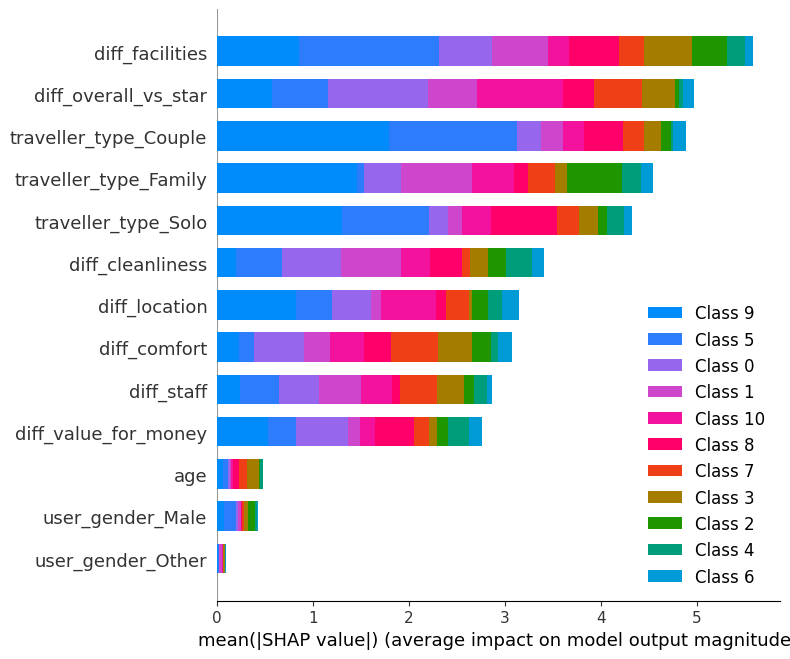

C:\Users\abdel\AppData\Local\Temp\ipykernel_17444\2410202619.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
c:\Users\abdel\fire_env_tf\lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\abdel\fire_env_tf\lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\abdel\fire_env_tf\lib\site

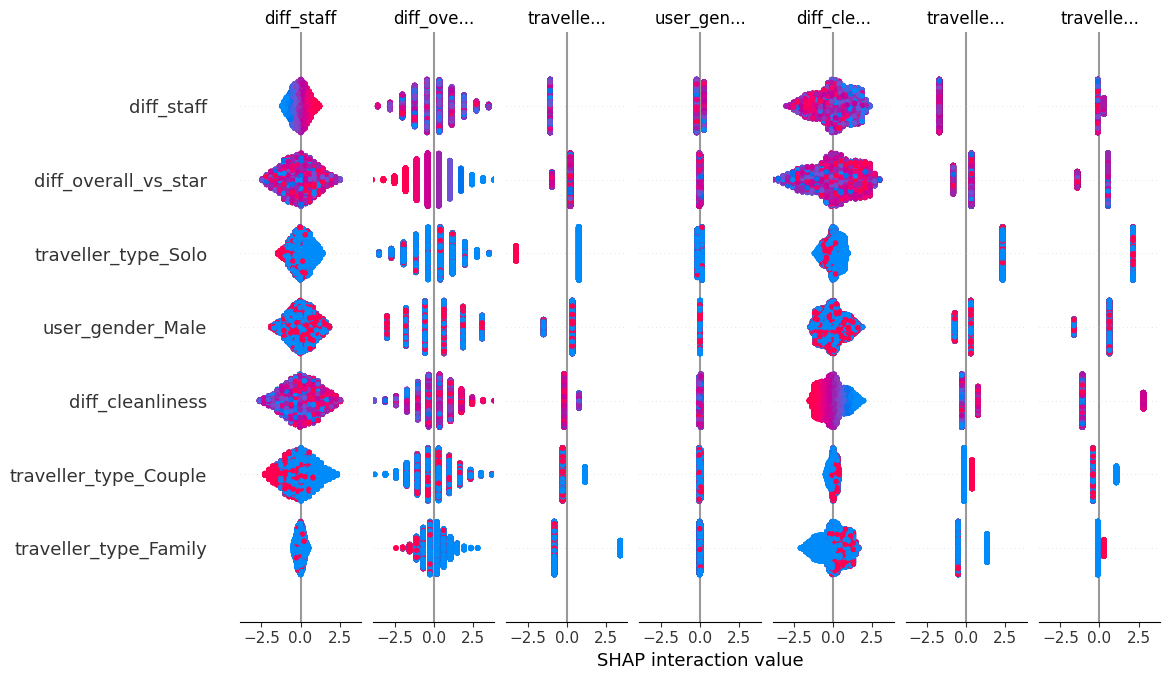

In [86]:
# global explanation
explainer = shap.LinearExplainer(log_model, X_train)

shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_values = shap_values[1] if len(shap_values) > 1 else shap_values[0]


shap_values = np.array(shap_values, dtype=np.float64)


shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=X_test.shape[1], show=True)
shap.summary_plot(shap_values, X_test)

In [87]:
# shap.initjs()

# # Use only a sample of X_train to make SHAP faster
# X_train_sample = X_train.sample(300, random_state=42)

# # Initialize SHAP LinearExplainer for Logistic Regression
# explainer = shap.LinearExplainer(log_model, X_train_sample)

# # Compute SHAP values
# shap_values = explainer.shap_values(X_test)

# # Handle cases where shap_values is a list (multi-class models)
# if isinstance(shap_values, list):
#     shap_values = shap_values[1] if len(shap_values) > 1 else shap_values[0]

# # Convert to numpy array safely
# shap_values = np.array(shap_values, dtype=np.float64)

# # Pick one test example (e.g., index 5)
# sample_idx = 5

# # Select that row
# X_sample = X_test.iloc[[sample_idx]]

# # Compute SHAP values for this instance
# shap_values_sample = explainer.shap_values(X_sample)

# # Handle multi-class
# if isinstance(shap_values_sample, list):
#     shap_values_sample = shap_values_sample[1] if len(shap_values_sample) > 1 else shap_values_sample[0]

# # Local force plot for one prediction
# shap.force_plot(
#     explainer.expected_value, 
#     shap_values_sample, 
#     X_sample
# )

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Ensure consistent random state
np.random.seed(42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ---- Create LIME Explainer ----
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=log_model.classes_.astype(str),
    mode='classification',
    discretize_continuous=True
)

# ---- Pick one instance ----
sample_idx = 39
sample = X_test.iloc[sample_idx]

# Get model prediction for this instance
pred_label = log_model.predict(sample.values.reshape(1, -1))[0]      # e.g. "Western_Europe"
pred_class_idx = np.where(log_model.classes_ == pred_label)[0][0]    # convert to numeric index
pred_class_name = log_model.classes_[pred_class_idx]

print(f"Predicted class: {pred_class_name}")

# ---- Explain ONLY the predicted class ----
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=log_model.predict_proba, 
    num_features=10,
    labels=[pred_class_idx]   # ✅ use numeric index
)

# ---- Visualize ----
exp.show_in_notebook(show_table=True, labels=[pred_class_idx])

# ---- Text summary ----
print(f"\nLIME Explanation for predicted class '{pred_class_name}':")
for feature, weight in exp.as_list(label=pred_class_idx):
    print(f"{feature}: {weight:.4f}")

Train shape: (40000, 13)
Test shape: (10000, 13)
Predicted class: Western_Europe


c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\abdel\fire_env_tf\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\abdel\fire_env_tf\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\abdel\fire_env_tf\lib\site-packages\lime\lime_tabular.py:544: FutureW


LIME Explanation for predicted class 'Western_Europe':
diff_overall_vs_star <= 3.80: -0.1643
traveller_type_Family <= 0.00: 0.1021
diff_location <= -0.40: 0.0948
diff_staff <= -0.30: 0.0415
traveller_type_Solo <= 0.00: 0.0371
0.00 < diff_value_for_money <= 0.30: -0.0312
0.00 < diff_comfort <= 0.20: -0.0236
0.00 < traveller_type_Couple <= 1.00: 0.0162
-0.40 < diff_cleanliness <= 0.00: 0.0161
age > 4.00: 0.0115


In [90]:
# Encode string labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode for NN output layer
y_categorical = to_categorical(y_encoded)

In [91]:
print("y_encoded shape:", y_encoded.shape)
print("y_categorical shape:", y_categorical.shape)

y_encoded shape: (50000,)
y_categorical shape: (50000, 11)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # number of country groups
])

c:\Users\abdel\fire_env_tf\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
#test model(no change)
# num_features = X_train_scaled.shape[1]
# num_classes = y_train.shape[1]  

# model = Sequential([
#     Dense(128, activation='relu', input_shape=(num_features,)),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(num_classes, activation='softmax')
# ])


In [96]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

X_train_scaled shape: (40000, 13)
y_train shape: (40000, 11)


In [97]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1)

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("=== Neural Network Evaluation ===")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='weighted'))
print("Recall:", recall_score(y_true, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
print("\nDetailed Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))


Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3052 - loss: 1.9652 - val_accuracy: 0.3478 - val_loss: 1.7504
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3644 - loss: 1.7158 - val_accuracy: 0.3874 - val_loss: 1.6246
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3837 - loss: 1.6169 - val_accuracy: 0.4013 - val_loss: 1.5337
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3967 - loss: 1.5460 - val_accuracy: 0.4065 - val_loss: 1.4731
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4014 - loss: 1.5022 - val_accuracy: 0.4072 - val_loss: 1.4453
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4039 - loss: 1.4726 - val_accuracy: 0.4166 - val_loss: 1.4114
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4048 - loss: 1.4530 - val_accuracy: 0.4166 - val_loss: 1.3946
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4118 - loss: 1.4333 - 

c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abdel\fire_env_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abdel\fire_en

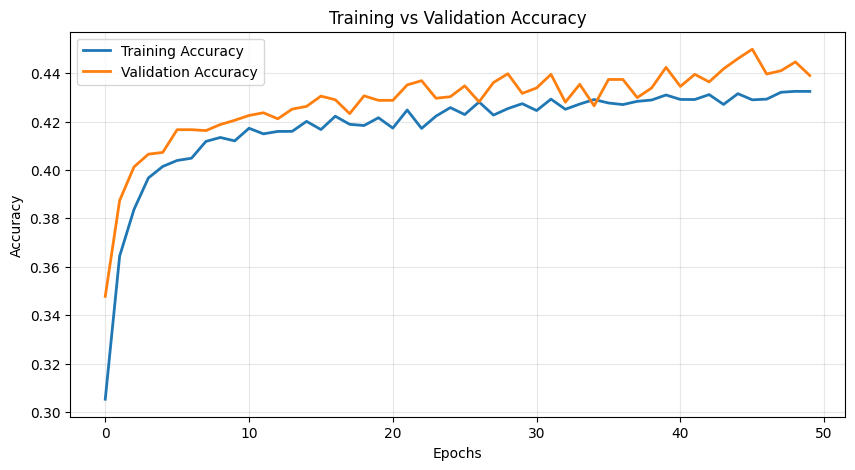

In [98]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [99]:
X_sample = X_test_scaled[:300]

In [100]:
# Define a prediction function that outputs probabilities
def predict_fn(data):
    return model.predict(data, verbose=0)

# Initialize SHAP KernelExplainer
background = shap.sample(X_train_scaled, 100, random_state=42)
explainer = shap.KernelExplainer(predict_fn, background)

In [101]:
# Compute SHAP values for a smaller batch
shap_values = explainer.shap_values(background[:10])

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\abdel\AppData\Local\Temp\ipykernel_17444\2589127859.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


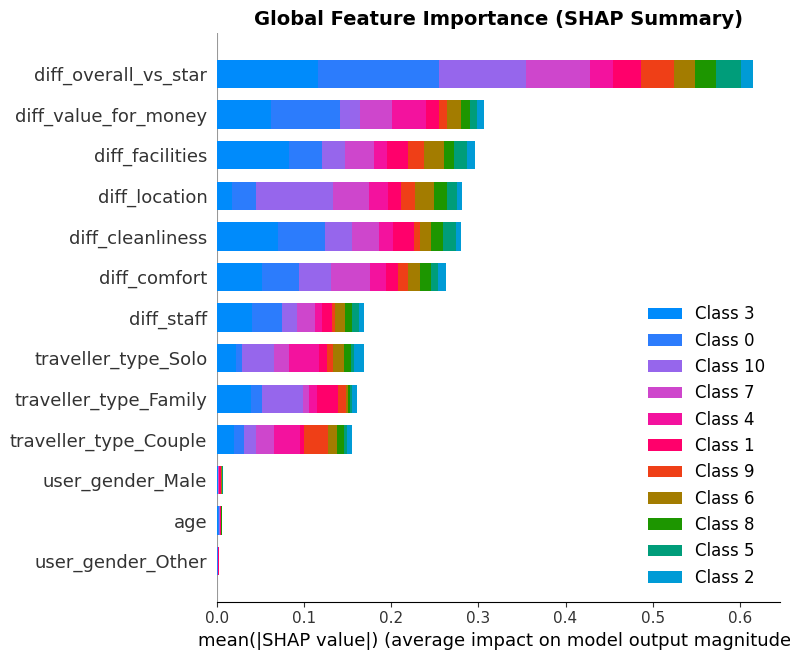

In [102]:
# Create a SHAP summary plot for global feature importance
shap.summary_plot(
    shap_values,
    X_sample[:100],
    feature_names=X.columns,
    plot_type="bar",
    show=False
)

plt.title("Global Feature Importance (SHAP Summary)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [106]:
def predict_country_group(raw_input):
    """
    Predicts the country_group for a new sample based on raw input.

    Prints each class probability on a new line (clean format).
    """


    feature_columns = [
        'diff_overall_vs_star', 'diff_cleanliness', 'diff_comfort',
        'diff_facilities', 'diff_location', 'diff_staff',
        'diff_value_for_money', 'traveller_type_Couple',
        'traveller_type_Family', 'traveller_type_Solo',
        'user_gender_Male', 'user_gender_Other', 'age'
    ]

    # Convert input dict to DataFrame and scale
    input_df = pd.DataFrame([raw_input])[feature_columns]
    scaled_input = scaler.transform(input_df)

    # Predict
    probs = model.predict(scaled_input)
    predicted_class = np.argmax(probs, axis=1)[0]
    predicted_group = le.inverse_transform([predicted_class])[0]

    # Convert probabilities to plain floats
    class_probs = {cls: float(prob) for cls, prob in zip(le.classes_, probs[0])}

    # Print neatly
    print(f"\nPredicted Country Group: {predicted_group}\n")
    print("Class Probabilities:")
    for cls, prob in class_probs.items():
        print(f"  {cls}: {prob:.3f}")

    return {
        "predicted_group": predicted_group,
        "probabilities": class_probs
    }


In [108]:
sample_input = {
    "diff_overall_vs_star": 3.7,
    "diff_cleanliness": -0.5,
    "diff_comfort": -0.1,
    "diff_facilities": -0.4,
    "diff_location": -0.5,
    "diff_staff": 0.2,
    "diff_value_for_money": 0.7,
    "traveller_type_Couple": 0,
    "traveller_type_Family": 0,
    "traveller_type_Solo": 1,
    "user_gender_Male": 0,
    "user_gender_Other": 0,
    "age": 2
}


result = predict_country_group(sample_input)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Predicted Country Group: North_America

Class Probabilities:
  Africa: 0.099
  East_Asia: 0.000
  Eastern_Europe: 0.000
  Middle_East: 0.000
  North_America: 0.506
  North_America_Mexico: 0.055
  Oceania: 0.000
  South_America: 0.269
  South_Asia: 0.068
  Southeast_Asia: 0.000
  Western_Europe: 0.002
{'predicted_group': 'North_America', 'probabilities': {'Africa': 0.09937130659818649, 'East_Asia': 1.1649152658738394e-21, 'Eastern_Europe': 3.812333594706549e-20, 'Middle_East': 1.706930419231867e-08, 'North_America': 0.5064576268196106, 'North_America_Mexico': 0.055297043174505234, 'Oceania': 1.9873045857821126e-06, 'South_America': 0.26925620436668396, 'South_Asia': 0.06805896013975143, 'Southeast_Asia': 2.866642902559336e-29, 'Western_Europe': 0.0015568060334771872}}


In [109]:
def predict_country_group(raw_input):
    """
    Predicts the country_group for a new sample based on *raw* user input.

    Automatically computes differences between scores and base scores,
    converts categorical and boolean fields, scales numeric values, and
    prints probabilities neatly.
    """

    # --- STEP 1: Convert age_group into a numeric value ---
    age_group_map = {
        "18-25": 1,
        "26-35": 2,
        "36-45": 3,
        "46-55": 4,
        "56+": 5
    }
    age_value = age_group_map.get(raw_input.get("age_group"), 3)  # default: 36-45

    # --- STEP 2: Calculate diff columns ---
    diff_overall_vs_star = raw_input["score_overall"] - raw_input["star_rating"]
    diff_cleanliness = raw_input["score_cleanliness"] - raw_input["cleanliness_base"]
    diff_comfort = raw_input["score_comfort"] - raw_input["comfort_base"]
    diff_facilities = raw_input["score_facilities"] - raw_input["facilities_base"]
    diff_location = raw_input["score_location"] - raw_input["location_base"]
    diff_staff = raw_input["score_staff"] - raw_input["staff_base"]
    diff_value_for_money = raw_input["score_value_for_money"] - raw_input["value_for_money_base"]

    # --- STEP 3: Build model-ready feature dictionary ---
    model_input = {
        "diff_overall_vs_star": diff_overall_vs_star,
        "diff_cleanliness": diff_cleanliness,
        "diff_comfort": diff_comfort,
        "diff_facilities": diff_facilities,
        "diff_location": diff_location,
        "diff_staff": diff_staff,
        "diff_value_for_money": diff_value_for_money,
        "traveller_type_Couple": 1 if raw_input["traveller_type"] == "Couple" else 0,
        "traveller_type_Family": 1 if raw_input["traveller_type"] == "Family" else 0,
        "traveller_type_Solo": 1 if raw_input["traveller_type"] == "Solo" else 0,
        "user_gender_Male": 1 if raw_input["user_gender"] == "Male" else 0,
        "user_gender_Other": 1 if raw_input["user_gender"] == "Other" else 0,
        "age": age_value
    }

    # --- STEP 4: Prepare input DataFrame and scale ---
    feature_columns = [
        'diff_overall_vs_star', 'diff_cleanliness', 'diff_comfort',
        'diff_facilities', 'diff_location', 'diff_staff',
        'diff_value_for_money', 'traveller_type_Couple',
        'traveller_type_Family', 'traveller_type_Solo',
        'user_gender_Male', 'user_gender_Other', 'age'
    ]

    input_df = pd.DataFrame([model_input])[feature_columns]
    scaled_input = scaler.transform(input_df)

    # --- STEP 5: Predict using the neural network ---
    probs = model.predict(scaled_input)
    predicted_class = np.argmax(probs, axis=1)[0]
    predicted_group = le.inverse_transform([predicted_class])[0]

    # --- STEP 6: Print results cleanly ---
    print(f"\nPredicted Country Group: {predicted_group}\n")
    print("Class Probabilities:")
    for cls, prob in zip(le.classes_, probs[0]):
        print(f"  {cls}: {float(prob):.3f}")

    return {
        "predicted_group": predicted_group,
        "probabilities": {cls: float(prob) for cls, prob in zip(le.classes_, probs[0])}
    }


In [110]:
sample_input = {
    "age_group": "26-35",
    "user_gender": "Female",
    "traveller_type": "Solo",
    "score_overall": 8.7,
    "star_rating": 5,
    "score_cleanliness": 8.5,
    "cleanliness_base": 9.0,
    "score_comfort": 8.2,
    "comfort_base": 8.5,
    "score_facilities": 7.8,
    "facilities_base": 8.0,
    "score_location": 8.9,
    "location_base": 9.3,
    "score_staff": 9.1,
    "staff_base": 9.0,
    "score_value_for_money": 8.4,
    "value_for_money_base": 8.0
}

result = predict_country_group(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Predicted Country Group: South_America

Class Probabilities:
  Africa: 0.000
  East_Asia: 0.000
  Eastern_Europe: 0.000
  Middle_East: 0.003
  North_America: 0.173
  North_America_Mexico: 0.000
  Oceania: 0.017
  South_America: 0.406
  South_Asia: 0.263
  Southeast_Asia: 0.000
  Western_Europe: 0.137


In [113]:
sample_input = {
    "age_group": "36-45",
    "user_gender": "Male",
    "traveller_type": "Solo",

    # Raw scores vs base values (chosen to produce the same diffs)
    "score_overall": 8.8,
    "star_rating": 5.0,                      # 8.8 - 5.0 = 3.8

    "score_cleanliness": 8.0,
    "cleanliness_base": 8.5,                 # diff = -0.5

    "score_comfort": 7.6,
    "comfort_base": 8.0,                     # diff = -0.4

    "score_facilities": 7.4,
    "facilities_base": 8.0,                  # diff = -0.6

    "score_location": 8.9,
    "location_base": 9.0,                    # diff = -0.1

    "score_staff": 9.7,
    "staff_base": 9.0,                       # diff = +0.7

    "score_value_for_money": 8.3,
    "value_for_money_base": 8.0              # diff = +0.3
}


result = predict_country_group(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Predicted Country Group: South_America

Class Probabilities:
  Africa: 0.001
  East_Asia: 0.000
  Eastern_Europe: 0.000
  Middle_East: 0.032
  North_America: 0.059
  North_America_Mexico: 0.000
  Oceania: 0.074
  South_America: 0.440
  South_Asia: 0.234
  Southeast_Asia: 0.000
  Western_Europe: 0.161
